In [40]:
import pandas as pd
import numpy as np
import seaborn as sn
from tqdm import tqdm
import urllib.parse
import grequests

In [ ]:
clean = pd.read_excel('./July/July.xlsx',sheet_name='all')

In [4]:
clean.head()

,Order,Source,ChemicalName,C18RT,PFPRT,INCHIKEY,Short,CanonicalSMILES
0,1,analyticon,Chebuloside II,3.647,3.378,DZVIFFMYEULLBY-NSOPSRGASA-N,DZVIFFMYEULLBY,CC1(CCC2(CCC3(C(=CCC4C3(CC(C5C4(CC(C(C5(C)CO)O...
1,2,analyticon,Nigaichigoside F1,3.635,3.403,WKKBYJLXSKPKSC-VBXFOCAZSA-N,WKKBYJLXSKPKSC,CC1CCC2(CCC3(C(=CCC4C3(CCC5C4(CC(C(C5(C)CO)O)O...
2,3,analyticon,Arjunglucoside I,3.869,3.410,CMZFNIMQBCBHEX-KXLFRROQSA-N,CMZFNIMQBCBHEX,CC1(CCC2(CCC3(C(=CCC4C3(CCC5C4(CC(C(C5(C)CO)O)...
3,4,analyticon,Ilexsaponin A1,4.800,4.360,AWFZJSUJFSUBQU-FZEZCDDVSA-N,AWFZJSUJFSUBQU,CC1CCC2(CCC3(C(=CCC4C3(CCC5C4(CCC(C5(C)C(=O)O)...
4,5,analyticon,CID 45783224,4.544,4.171,KISJFUMXCJBLJV-ZZDFEWANSA-N,KISJFUMXCJBLJV,CC(=C)CCC(=O)C(C)(C1C(CC2(C1(CC(=O)C3(C2CC=C4C...


## Check duplicates

### C18

,INCHIKEY,diff
3,BTCICADMSGBCKA-UHFFFAOYSA-N,0.312
9,PVHUKALHRBPQNM-BSWSSELBSA-N,1.203
17,SRCSHETVEHQXLC-RBISFHTESA-N,0.800
23,LHZKHFYNHHUDEF-UHFFFAOYSA-N,0.311
25,YSFNIMJWUPAQKC-XZOQMXBNSA-N,1.143
26,XFAGPJNDBTUJPH-PJQSMRKJSA-N,2.683
31,FFMVHFPLIIYYNC-UHFFFAOYSA-N,1.111
44,RNQBLQALVMHBKH-UHFFFAOYSA-N,0.600
58,ULSUXBXHSYSGDT-UHFFFAOYSA-N,0.360
60,OEWCQSJKSNWJTH-UHFFFAOYSA-N,1.866


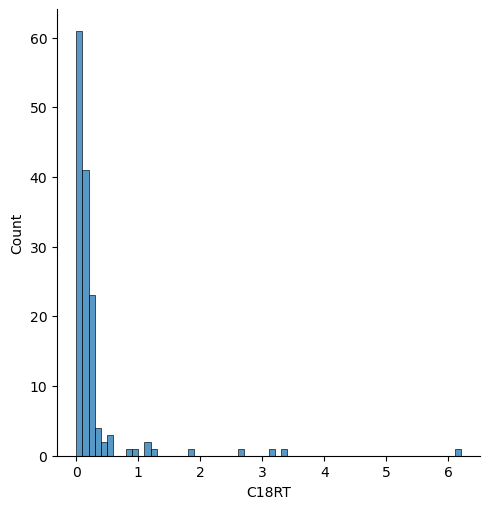

In [21]:
for column in ['C18RT']:
    clean2 = clean[clean[column].notnull()]
    dup = clean2['INCHIKEY'][clean2.duplicated(['INCHIKEY'],keep=False)]
    dup = dup.unique()
    diff = []
    for key in dup:
        value = clean[column][clean['INCHIKEY']==key]
        diff.append(value.max() - value.min())
    
    hist = sn.displot(diff,binwidth=0.1)
    hist.set(xlabel=column)
    
    df = pd.DataFrame({'INCHIKEY':dup, 'diff':diff})
    mean = df['diff'].mean()
df[df['diff']>0.3]

,INCHIKEY,diff
2,ZOEFIRUNMVHSJA-XXZDZOCTSA-N,1.150
4,DNXHEGUUPJUMQT-CBZIJGRNSA-N,0.492
5,BTCICADMSGBCKA-UHFFFAOYSA-N,2.480
6,NPDSHTNEKLQQIJ-SIGMCMEVSA-N,0.978
11,OGTDCWCKOKLYSK-UHFFFAOYSA-N,3.103
...,...,...
127,OVBPIULPVIDEAO-LBPRGKRZSA-N,0.369
129,IXORZMNAPKEEDV-OBDJNFEBSA-N,0.345
130,WUBBRNOQWQTFEX-UHFFFAOYSA-N,0.324
135,AGOYDEPGAOXOCK-KCBOHYOISA-N,0.398


### PFP

PFP result is worse than C18;
1) more duplicates
2) more difference > 0.3 min

,INCHIKEY,diff
2,ZOEFIRUNMVHSJA-XXZDZOCTSA-N,1.150
4,DNXHEGUUPJUMQT-CBZIJGRNSA-N,0.492
5,BTCICADMSGBCKA-UHFFFAOYSA-N,2.480
6,NPDSHTNEKLQQIJ-SIGMCMEVSA-N,0.978
11,OGTDCWCKOKLYSK-UHFFFAOYSA-N,3.103
...,...,...
127,OVBPIULPVIDEAO-LBPRGKRZSA-N,0.369
129,IXORZMNAPKEEDV-OBDJNFEBSA-N,0.345
130,WUBBRNOQWQTFEX-UHFFFAOYSA-N,0.324
135,AGOYDEPGAOXOCK-KCBOHYOISA-N,0.398


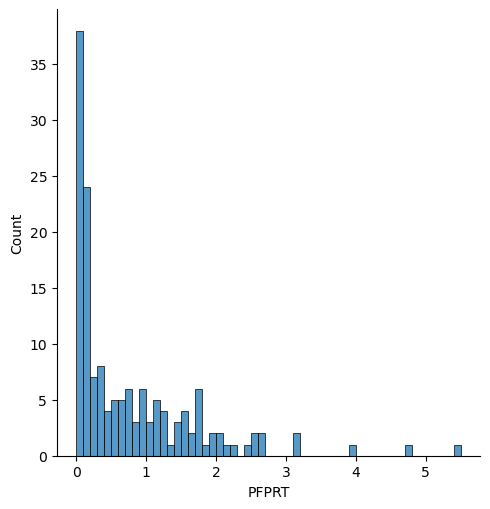

In [19]:
for column in ['PFPRT']:
    clean2 = clean[clean[column].notnull()]
    dup = clean2['INCHIKEY'][clean2.duplicated(['INCHIKEY'],keep=False)]
    dup = dup.unique()
    diff = []
    for key in dup:
        value = clean[column][clean['INCHIKEY']==key]
        diff.append(value.max() - value.min())
    
    hist = sn.displot(diff,binwidth=0.1)
    hist.set(xlabel=column)
    
    df = pd.DataFrame({'INCHIKEY':dup, 'diff':diff})
    mean = df['diff'].mean()
df[df['diff']>0.3]

## Get classifications

### Remove null SMILES

In [37]:
clean = clean[clean['CanonicalSMILES'].notnull()]

### Classyfire
API: https://gnps-structure.ucsd.edu/classyfire?smiles=<smiles string\>


### NP Classifier
API: http://127.0.0.1:6541/classify?smiles=<smiles string\>

In [61]:
SERVER_URL = "http://192.168.128.240:6541/"
SERVER_URL = "https://npclassifier.ucsd.edu/"
smiles_list = clean["CanonicalSMILES"].to_list()

all_urls = []

for smiles in smiles_list:
   

    request_url = "{}/classify?smiles={}".format(SERVER_URL, urllib.parse.quote(smiles))
    all_urls.append(request_url)

In [62]:
# Lets actually do the query 
rs = (grequests.get(u) for u in all_urls)
responses = grequests.map(rs, size=20)

In [63]:
# convert results to df
C = []
pathway = []
SC = []
glyco = []
for r in responses:
    test = r.json()  
    C.append(test['class_results'])              
    pathway.append(test['pathway_results'])
    SC.append(test['superclass_results'])
    glyco.append(test['isglycoside'])
    
    
df = pd.DataFrame({'SMILES':smiles_list,'pathway_results':pathway, 'superclass_results':SC, 'class_results':C, 'isglycoside':glyco })

                    

JSONDecodeError: [Errno Expecting value] <!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<title>500 Internal Server Error</title>
<h1>Internal Server Error</h1>
<p>The server encountered an internal error and was unable to complete your request. Either the server is overloaded or there is an error in the application.</p>
: 0

In [ ]:
df.head()

In [5]:
clean['INCHIKEY'].unique()

array(['DZVIFFMYEULLBY-NSOPSRGASA-N', 'WKKBYJLXSKPKSC-VBXFOCAZSA-N',
       'CMZFNIMQBCBHEX-KXLFRROQSA-N', ..., 'FSVJFNAIGNNGKK-UHFFFAOYSA-N',
       'OIGNJSKKLXVSLS-VWUMJDOOSA-N', 'LRJOMUJRLNCICJ-JZYPGELDSA-N'],
      dtype=object)